<a href="https://colab.research.google.com/github/shreddy1/Analyzing-HeartDisease-using-MachineLearning-techniques/blob/master/HeartDisease_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
heart= pd.read_csv("/content/heart_Disease.csv")

#Prints the name of the columns of the dataset.
print(heart.columns)

#Prints the number of rows and columns.
print(heart.shape)

#Prints the first 5 rows of the dataset.
heart.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


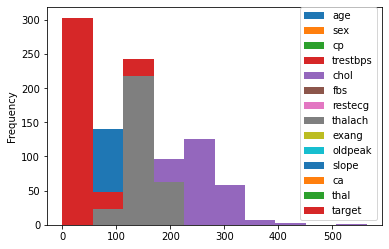

In [3]:
#Histogram fot the Heart Disease dataset.
heart.plot.hist()

In [4]:
#Checks if the dataset has any null values. 
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


1    165
0    138
Name: target, dtype: int64


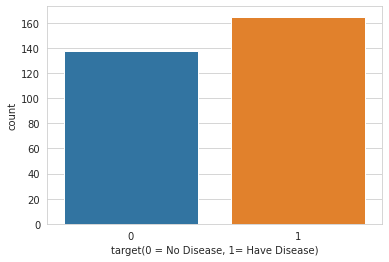

In [22]:
#Prints how many patients have heart disease and how many don't.
print(heart.target.value_counts())

#Bar graph for Heart disease vs no disease.
sns.countplot(x="target", data=heart)
plt.xlabel("target(0 = No Disease, 1= Have Disease)")
plt.show()

In [6]:
#Displays percentage of patients who have heart disease and no disease.
No_Disease = len(heart[heart.target == 0])
Have_Disease = len(heart[heart.target == 1])
print("Patients who don't have Heart Disease: {:.2f}%".format((No_Disease / (len(heart.target))*100)))
print("Patients who have Heart Disease: {:.2f}%".format((Have_Disease / (len(heart.target))*100)))

Patients who don't have Heart Disease: 45.54%
Patients who have Heart Disease: 54.46%


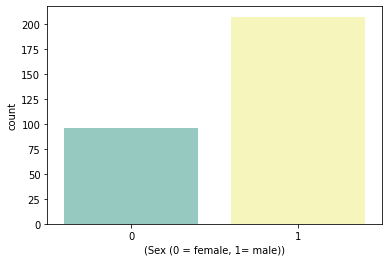

In [7]:
#Prints how many male and female patients are there.
print(heart.sex.value_counts())

#Bar graph for Male and Female patients
sns.countplot(x='sex', data=heart, palette="Set3")
plt.xlabel("(Sex (0 = female, 1= male))")
plt.show()


In [8]:
#Displays percentage of male and female patients.
Numof_Female = len(heart[heart.sex == 0])
Numof_Male = len(heart[heart.sex == 1])
print("Number of Female Patients: {:.2f}%".format((Numof_Female / (len(heart.sex))*100)))
print("Number of Male Patients: {:.2f}%".format((Numof_Male / (len(heart.sex))*100)))

Number of Female Patients: 31.68%
Number of Male Patients: 68.32%


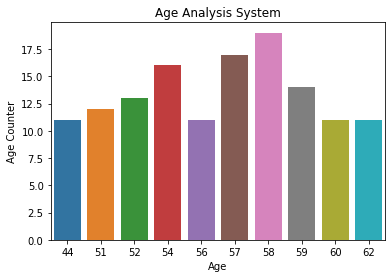

In [9]:
sns.barplot(x=heart.age.value_counts()[:10].index,y=heart.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [10]:
min_age=min(heart.age)
max_age=max(heart.age)
print('Minimum Age :',min_age)
print('Maximum Age :',max_age)


Minimum Age : 29
Maximum Age : 77


In [11]:
young_age=heart[(heart.age>=29)&(heart.age<40)]
middle_age=heart[(heart.age>=40)&(heart.age<55)]
elderly_age=heart[(heart.age>55)]
print('Young Age :',len(young_age))
print('Middle Age :',len(middle_age))
print('Elderly Age :',len(elderly_age))

Young Age : 16
Middle Age : 128
Elderly Age : 151


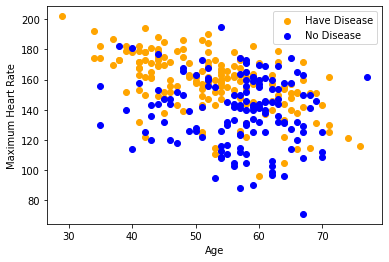

In [12]:
#Scatter plot for Maximum Heart Rate: Disease/Not Disease 
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="orange")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)], c="blue")
plt.legend(["Have Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [0]:
y = heart.target.values
# print(y)
x_data = heart.drop(['target'], axis = 1)
# print(x_data)

In [0]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [0]:
#Training and testing- 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [0]:
#Performing matrix transpose.
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

K-NN Model Classification 


In [17]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 83.61%


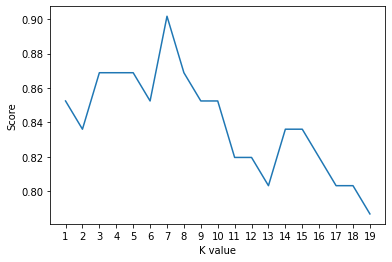

Maximum KNN Score is 90.16%


In [18]:
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
#Accuracy Predictor
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [19]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
#Accuracy Predictor
acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 85.25%


In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
#Accuracy Predictor
acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.41%


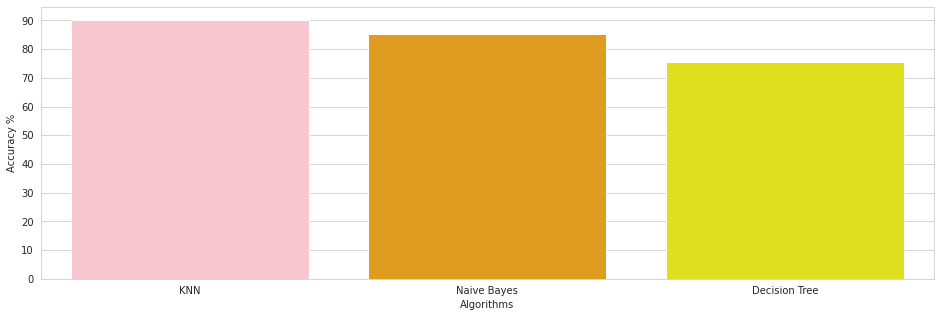

In [21]:
colors = ["pink","orange","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()